# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 5 - Random Walk

In [35]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Random Walk

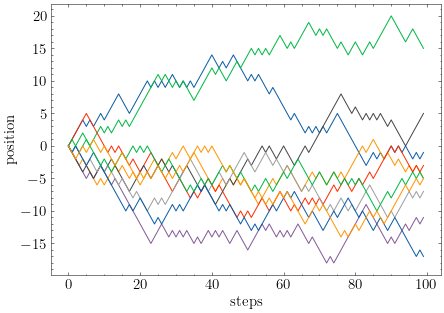

In [44]:
np.random.seed(0) # For reproducibility

N = 100 # steps
M = 10 # walkers
p = 0.5 # probability
a = 1.0 # step size

x = np.zeros((N, M))

for m in range(M):
    for n in range(N-1):
        if np.random.rand() >= p:
            x[n+1, m] = x[n, m] + a
        else:
            x[n+1, m] = x[n, m] - a
            
# Plotting

plt.plot(x)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

In [82]:
# Making it a function

def random_walk_1d(N, M, p=0.5, a=1.0):
    x = np.zeros((N, M))

    for m in range(M):
        for n in range(N-1):
            if np.random.rand() >= p:
                x[n+1, m] = x[n, m] + a
            else:
                x[n+1, m] = x[n, m] - a
    
    return x

In [84]:
# Getting some statistics

x = random_walk_1d(1000, 1000, p=0.5, a=1.0)

x_mean = np.mean(x[-1, :])
x2_mean = np.mean(x[-1, :]**2)

In [85]:
x2_mean

1049.072

In [72]:
4*p*(1-p)*N*(a**2)

100.0

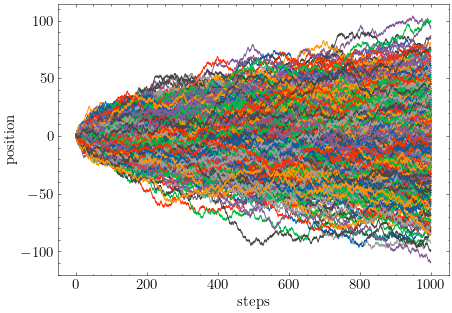

In [64]:
plt.plot(x)
plt.xlabel('steps')
plt.ylabel('position')
plt.show()

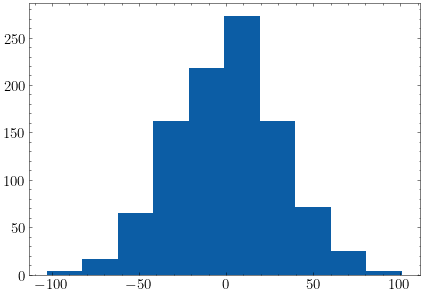

In [81]:
plt.hist(x[-1, :])
plt.show()

# 2D Random Walk

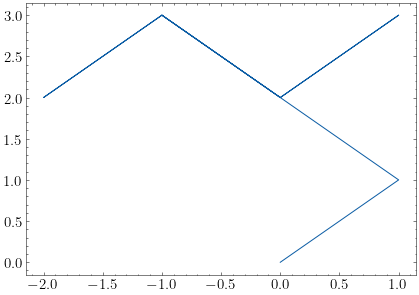

In [90]:
N = 10
M = 3
r = np.zeros((N, 2, M))

for m in range(M):
    for n in range(N-1):
        for coord in range(2):
            if np.random.rand() >= p:
                r[n+1, coord, m] = r[n, coord, m] + a
            else:
                r[n+1, coord, m] = r[n, coord, m] - a
            
        
plt.plot(r[:,0, 0], r[:,1, 0])

In [123]:
N = 10
r = np.zeros((N, 2))

for n in range(N-1):
    if np.random.random() <= 0.25:
        r[n+1, 0] = r[n, 0] + 1.0
    elif 0.25 < np.random.random() <= 0.5:
        r[n+1, 0] = r[n, 0] - 1.0
    elif 0.5 < np.random.random() <= 0.75:
        r[n+1, 1] = r[n, 1] + 1.0
    elif 0.75 < np.random.random():
        r[n+1, 1] = r[n, 1] - 1.0

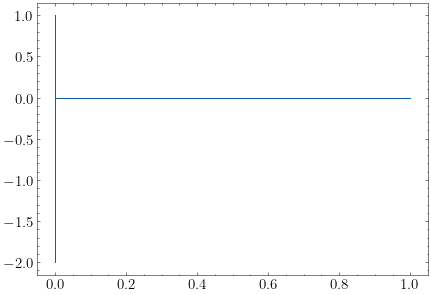

In [124]:
plt.plot(r[:, 0], r[:, 1])

In [121]:
for n in range(N-1):
    r = np.random.random() 
    if np.random.random() <= 0.25:
        r[n+1, 0] = r[n, 0] + 1.0
    elif 0.25 < np.random.random() <= 0.5:
        r[n+1, 0] = r[n, 0] - 1.0
    elif 0.5 < np.random.random() <= 0.75:
        r[n+1, 1] = r[n, 1] + 1.0
    elif 0.75 < np.random.random():
        r[n+1, 1] = r[n, 1] - 1.0

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.]])

In [130]:
for i in range(20):
    r = np.random.random()
    print(r)
    if r <= 0.25:
        print('left')
    elif 0.25 < r <= 0.5:
        print('right')
    elif 0.5 < r <= 0.75:
        print('up')
    elif 0.75 < r:
        print('down')

0.6106020495849347
up
0.2793031070386731
right
0.27119525422980784
right
0.7266868987097432
up
0.7603531998386835
down
0.3968287124000428
right
0.4401893408141979
right
0.00928878911082176
left
0.35783409521753906
right
0.7739551170766096
down
0.31811850990461665
right
0.12857483433516748
left
0.5470409793781071
up
0.8490701292399198
down
0.5341065814824331
up
0.08925871884351966
left
0.13033901443461626
left
0.22648117665392997
left
0.378182375455388
right
0.41004866249501815
right
